In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Mounted at /content/drive


# **1. Dataset Selection**

In [ ]:
somadata=pd.read_csv('/content/drive/MyDrive/Madonna/SomaticPointMutationMatrix.csv',index_col=[0])
somadata
comdata=pd.read_csv('/content/drive/MyDrive/Madonna/combined.csv',index_col=[0])
comdata

,A1CF,A2M,A2ML1,AADACL4,AARS,AARS2,AASDH,AATF,AATK,ABCA1,ABCA12,ABCA13,ABCA2,ABCA3,ABCA4,ABCA9,ABCB1,ABCB11,ABCB4,ABCB7,ABCC1,ABCC10,ABCC2,ABCC3,ABCC4,ABCC5,ABCC8,ABCC9,ABCD1,ABCD2,ABCG4,ABCG8,ABHD10,ABHD4,ABL1,ABL2,ABTB1,ACADS,ACAN,ACCSL,...,TTLL8.p,TTLL8.n,TUBB8.p,TUSC7.p,TUSC7.n,TWIST2.p,UBE2I.p,UBTF.p,UGCG.n,ULK2.n,UNKL.p,VOPP1.p,VSTM2B.p,WDR60.p,WWOX.p,WWOX.n,XPO4.p,YAF2.n,YWHAE.p,ZDHHC11B.p,ZFHX3.n,ZFP36L1.n,ZMAT4.p,ZMAT4.n,ZMYND11.p,ZNF254.p,ZNF286B.n,ZNF292.n,ZNF503.p,ZNF587B.p,ZNF726.p,ZNF726.n,ZNF736.p,ZNF750.n,ZNF883.n,ZNF891.p,ZNF891.n,ZNRF3.n,ZRSR1.p,ZRSR1.n
TCGA.BL.A0C8.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0
TCGA.BL.A13I.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.BL.A13J.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0
TCGA.BL.A3JM.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
TCGA.BT.A0S7.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.YZ.A980.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.YZ.A982.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
TCGA.YZ.A983.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.YZ.A984.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
xdata=pd.read_csv('/content/drive/MyDrive/Madonna/datafinalcol2.csv',index_col=[0])
xdata

,0
0,A2M
1,AARS
2,AASDH
3,ABCA12
4,ABCA13
...,...
1845,ZNF891.p
1846,ZNF891.n
1847,ZNRF3.n
1848,ZRSR1.p


In [ ]:
scdata = comdata[xdata.values.ravel()]
scdata

,A2M,AARS,AASDH,ABCA12,ABCA13,ABCA9,ABCB1,ABCC1,ABCC4,ABCC8,ABHD10,ABL1,ABTB1,ACAN,ACE,ACOT12,ACP6,ACSL6,ACSM2B,ACTB,ACVR1B,ACVR2A,ADAM11,ADAM18,ADAM2,ADAM29,ADAMTS12,ADAMTS14,ADAMTS16,ADAMTS19,ADAMTS2,ADAMTS20,ADAMTS8,ADAMTS9,ADAMTSL3,ADCK5,ADCY8,ADCY9,ADGB,ADGRB1,...,TTLL8.p,TTLL8.n,TUBB8.p,TUSC7.p,TUSC7.n,TWIST2.p,UBE2I.p,UBTF.p,UGCG.n,ULK2.n,UNKL.p,VOPP1.p,VSTM2B.p,WDR60.p,WWOX.p,WWOX.n,XPO4.p,YAF2.n,YWHAE.p,ZDHHC11B.p,ZFHX3.n,ZFP36L1.n,ZMAT4.p,ZMAT4.n,ZMYND11.p,ZNF254.p,ZNF286B.n,ZNF292.n,ZNF503.p,ZNF587B.p,ZNF726.p,ZNF726.n,ZNF736.p,ZNF750.n,ZNF883.n,ZNF891.p,ZNF891.n,ZNRF3.n,ZRSR1.p,ZRSR1.n
TCGA.BL.A0C8.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0
TCGA.BL.A13I.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.BL.A13J.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0
TCGA.BL.A3JM.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
TCGA.BT.A0S7.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.YZ.A980.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.YZ.A982.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
TCGA.YZ.A983.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.YZ.A984.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
target = 'classLabels'
Y = somadata.loc[:, somadata.columns == target]
Y

,classLabels
TCGA.BL.A0C8.01,1
TCGA.BL.A13I.01,1
TCGA.BL.A13J.01,1
TCGA.BL.A3JM.01,1
TCGA.BT.A0S7.01,1
...,...
TCGA.YZ.A980.01,28
TCGA.YZ.A982.01,28
TCGA.YZ.A983.01,28
TCGA.YZ.A984.01,28


In [ ]:
df = pd.concat([scdata,Y], axis=1)
df

,A2M,AARS,AASDH,ABCA12,ABCA13,ABCA9,ABCB1,ABCC1,ABCC4,ABCC8,ABHD10,ABL1,ABTB1,ACAN,ACE,ACOT12,ACP6,ACSL6,ACSM2B,ACTB,ACVR1B,ACVR2A,ADAM11,ADAM18,ADAM2,ADAM29,ADAMTS12,ADAMTS14,ADAMTS16,ADAMTS19,ADAMTS2,ADAMTS20,ADAMTS8,ADAMTS9,ADAMTSL3,ADCK5,ADCY8,ADCY9,ADGB,ADGRB1,...,TTLL8.n,TUBB8.p,TUSC7.p,TUSC7.n,TWIST2.p,UBE2I.p,UBTF.p,UGCG.n,ULK2.n,UNKL.p,VOPP1.p,VSTM2B.p,WDR60.p,WWOX.p,WWOX.n,XPO4.p,YAF2.n,YWHAE.p,ZDHHC11B.p,ZFHX3.n,ZFP36L1.n,ZMAT4.p,ZMAT4.n,ZMYND11.p,ZNF254.p,ZNF286B.n,ZNF292.n,ZNF503.p,ZNF587B.p,ZNF726.p,ZNF726.n,ZNF736.p,ZNF750.n,ZNF883.n,ZNF891.p,ZNF891.n,ZNRF3.n,ZRSR1.p,ZRSR1.n,classLabels
TCGA.BL.A0C8.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1
TCGA.BL.A13I.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TCGA.BL.A13J.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
TCGA.BL.A3JM.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
TCGA.BT.A0S7.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.YZ.A980.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28
TCGA.YZ.A982.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,28
TCGA.YZ.A983.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28
TCGA.YZ.A984.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,28


In [ ]:
#df.to_csv('Prep.csv')
#!cp Prep.csv "drive/My Drive/Madonna"

In [ ]:
label1 = df.loc[df['classLabels']== 1]
label1

,A2M,AARS,AASDH,ABCA12,ABCA13,ABCA9,ABCB1,ABCC1,ABCC4,ABCC8,ABHD10,ABL1,ABTB1,ACAN,ACE,ACOT12,ACP6,ACSL6,ACSM2B,ACTB,ACVR1B,ACVR2A,ADAM11,ADAM18,ADAM2,ADAM29,ADAMTS12,ADAMTS14,ADAMTS16,ADAMTS19,ADAMTS2,ADAMTS20,ADAMTS8,ADAMTS9,ADAMTSL3,ADCK5,ADCY8,ADCY9,ADGB,ADGRB1,...,TTLL8.n,TUBB8.p,TUSC7.p,TUSC7.n,TWIST2.p,UBE2I.p,UBTF.p,UGCG.n,ULK2.n,UNKL.p,VOPP1.p,VSTM2B.p,WDR60.p,WWOX.p,WWOX.n,XPO4.p,YAF2.n,YWHAE.p,ZDHHC11B.p,ZFHX3.n,ZFP36L1.n,ZMAT4.p,ZMAT4.n,ZMYND11.p,ZNF254.p,ZNF286B.n,ZNF292.n,ZNF503.p,ZNF587B.p,ZNF726.p,ZNF726.n,ZNF736.p,ZNF750.n,ZNF883.n,ZNF891.p,ZNF891.n,ZNRF3.n,ZRSR1.p,ZRSR1.n,classLabels
TCGA.BL.A0C8.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1
TCGA.BL.A13I.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TCGA.BL.A13J.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
TCGA.BL.A3JM.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
TCGA.BT.A0S7.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.H4.A2HQ.01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
TCGA.HQ.A2OE.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1
TCGA.K4.A3WS.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
TCGA.K4.A3WU.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
la1=label1.columns.tolist()
len(label1)


127

# **2.Function for counting** 

In [ ]:
def countList(label):
  labelList = label.columns.tolist()
  sum=len(label)
  #print(labelList)
  result=pd.DataFrame(columns=[0,1])
  for i in labelList:
    sam=label[i].value_counts()
    if(len(sam)==2):
      frame = { 0: sam[0]/sum, 1: sam[1]/sum }
    else:
      if(sam.index[0]==0):
        frame = { 0: 1, 1: 0 }
      else:
        frame = { 0: 0, 1: 1 }
    result1 = pd.DataFrame(index=[0,1])
    result1 = pd.DataFrame(frame, index=[i])
    #print(result1)
    result = result.append(result1)
  #print(result)
  #result = pd.concat([result,result1], axis=1,ignore_index=True)
  return result


# **3.Select Genes**

In [ ]:
def selectGenes(frame):
  frame=frame[frame[[0,1]]>0.999].dropna(how='all')
  frame=frame.dropna(axis=1,how='all')
  #frame.to_csv('free.csv')
  #!cp free.csv "drive/My Drive/"
  return frame
  

# **4.Applying to each class labels**

In [ ]:
label1 = df.loc[df['classLabels']== 1]
label1=label1.drop('classLabels',axis= 'columns')
df1 = countList(label1)
df1=selectGenes(df1)
df1
 
label2 = df.loc[df['classLabels']== 2]
label2=label2.drop('classLabels',axis= 'columns')
df2 = countList(label2)
df2=selectGenes(df2)
df2


label3 = df.loc[df['classLabels']== 3]
label3=label3.drop('classLabels',axis= 'columns')
df3 = countList(label3)
df3=selectGenes(df3)
df3

label4 = df.loc[df['classLabels']== 4]
label4=label4.drop('classLabels',axis= 'columns')
df4 = countList(label4)
df4=selectGenes(df4)
df4

label5 = df.loc[df['classLabels']== 5]
label5=label5.drop('classLabels',axis= 'columns')
df5 = countList(label5)
df5=selectGenes(df5)
df5

label6 = df.loc[df['classLabels']== 6]
label6=label6.drop('classLabels',axis= 'columns')
df6 = countList(label6)
df6=selectGenes(df6)
df6

label7 = df.loc[df['classLabels']== 7]
label7=label7.drop('classLabels',axis= 'columns')
df7 = countList(label7)
df7=selectGenes(df7)
df7

label8 = df.loc[df['classLabels']== 8]
label8=label8.drop('classLabels',axis= 'columns')
df8 = countList(label8)
df8=selectGenes(df8)
df8

label9 = df.loc[df['classLabels']== 9]
label9=label9.drop('classLabels',axis= 'columns')
df9 = countList(label9)
df9=selectGenes(df9)
df9

label10 = df.loc[df['classLabels']== 10]
label10=label10.drop('classLabels',axis= 'columns')
df10 = countList(label10)
df10=selectGenes(df10)
df10

label11 = df.loc[df['classLabels']== 11]
label11=label11.drop('classLabels',axis= 'columns')
df11 = countList(label11)
df11=selectGenes(df11)
df11

label12 = df.loc[df['classLabels']== 12]
label12=label12.drop('classLabels',axis= 'columns')
df12 = countList(label12)
df12=selectGenes(df12)
df12

label13 = df.loc[df['classLabels']== 13]
label13=label13.drop('classLabels',axis= 'columns')
df13 = countList(label13)
df13=selectGenes(df13)
df13

label14 = df.loc[df['classLabels']== 14]
label14=label14.drop('classLabels',axis= 'columns')
df14 = countList(label14)
df14=selectGenes(df14)
df14





,0
ABTB1,1.0
ADAM11,1.0
ADGRE1,1.0
ADPRHL2,1.0
AGBL1,1.0
...,...
FLJ36000.n,1.0
KCNJ18.n,1.0
NKX2.1.n,1.0
RNU86.n,1.0


In [ ]:
#df14.loc[df14[1]==1]

In [ ]:
label15 = df.loc[df['classLabels']== 15]
label15=label15.drop('classLabels',axis= 'columns')
df15 = countList(label15)
df15=selectGenes(df15)
df15

label16 = df.loc[df['classLabels']== 16]
label16=label16.drop('classLabels',axis= 'columns')
df16 = countList(label16)
df16=selectGenes(df16)
df16

label17 = df.loc[df['classLabels']== 17]
label17=label17.drop('classLabels',axis= 'columns')
df17 = countList(label17)
df17=selectGenes(df17)
df17

label18 = df.loc[df['classLabels']== 18]
label18=label18.drop('classLabels',axis= 'columns')
df18 = countList(label18)
df18=selectGenes(df18)
df18

label19 = df.loc[df['classLabels']== 19]
label19=label19.drop('classLabels',axis= 'columns')
df19 = countList(label19)
df19=selectGenes(df19)
df19

label20 = df.loc[df['classLabels']== 20]
label20=label20.drop('classLabels',axis= 'columns')
df20 = countList(label20)
df20=selectGenes(df20)
df20

label21 = df.loc[df['classLabels']== 21]
label21=label21.drop('classLabels',axis= 'columns')
df21 = countList(label21)
df21=selectGenes(df21)
df21

label22 = df.loc[df['classLabels']== 22]
label22=label22.drop('classLabels',axis= 'columns')
df22 = countList(label22)
df22=selectGenes(df22)
df22

label23 = df.loc[df['classLabels']== 23]
label23=label23.drop('classLabels',axis= 'columns')
df23 = countList(label23)
df23=selectGenes(df23)
df23

label24 = df.loc[df['classLabels']== 24]
label24=label24.drop('classLabels',axis= 'columns')
df24 = countList(label24)
df24=selectGenes(df24)
df24

label25 = df.loc[df['classLabels']== 25]
label25=label25.drop('classLabels',axis= 'columns')
df25 = countList(label25)
df25=selectGenes(df25)
df25

label26 = df.loc[df['classLabels']== 26]
label26=label26.drop('classLabels',axis= 'columns')
df26 = countList(label26)
df26=selectGenes(df26)
df26
 
label27 = df.loc[df['classLabels']== 27]
label27=label27.drop('classLabels',axis= 'columns')
df27 = countList(label27)
df27=selectGenes(df27)
df27

label28 = df.loc[df['classLabels']== 28]
label28=label28.drop('classLabels',axis= 'columns')
df28 = countList(label28)
df28=selectGenes(df28)
df28




,0
A2M,1
AARS,1
AASDH,1
ABCA9,1
ABCB1,1
...,...
TUSC7.p,1
ZMYND11.p,1
ZNF503.p,1
ZNF750.n,1


# **5. Saving dataframe to drive**

In [ ]:
df1.to_csv('df1.csv')
!cp df1.csv "drive/My Drive/Genes"
 
df2.to_csv('df2.csv')
!cp df2.csv "drive/My Drive/Genes"
 
df3.to_csv('df3.csv')
!cp df3.csv "drive/My Drive/Genes"
 
df4.to_csv('df4.csv')
!cp df4.csv "drive/My Drive/Genes"
 
df5.to_csv('df5.csv')
!cp df5.csv "drive/My Drive/Genes"
 
df6.to_csv('df6.csv')
!cp df6.csv "drive/My Drive/Genes"
 
df7.to_csv('df7.csv')
!cp df7.csv "drive/My Drive/Genes"
 
df8.to_csv('df8.csv')
!cp df8.csv "drive/My Drive/Genes"
 
df9.to_csv('df9.csv')
!cp df9.csv "drive/My Drive/Genes"
 
df10.to_csv('df10.csv')
!cp df10.csv "drive/My Drive/Genes"
 
df11.to_csv('df11.csv')
!cp df11.csv "drive/My Drive/Genes"
 
df12.to_csv('df12.csv')
!cp df12.csv "drive/My Drive/Genes"
 
df13.to_csv('df13.csv')
!cp df13.csv "drive/My Drive/Genes"
 
df14.to_csv('df14.csv')
!cp df14.csv "drive/My Drive/Genes"
 
 


In [ ]:
df15.to_csv('df15.csv')
!cp df15.csv "drive/My Drive/Genes"
 
df16.to_csv('df16.csv')
!cp df16.csv "drive/My Drive/Genes"
 
df17.to_csv('df17.csv')
!cp df17.csv "drive/My Drive/Genes"
 
df18.to_csv('df18.csv')
!cp df18.csv "drive/My Drive/Genes"
 
df19.to_csv('df19.csv')
!cp df19.csv "drive/My Drive/Genes"
 
df20.to_csv('df20.csv')
!cp df20.csv "drive/My Drive/Genes"
 
df21.to_csv('df21.csv')
!cp df21.csv "drive/My Drive/Genes"
 
df22.to_csv('df22.csv')
!cp df22.csv "drive/My Drive/Genes"
 
df23.to_csv('df23.csv')
!cp df23.csv "drive/My Drive/Genes"
 
df24.to_csv('df24.csv')
!cp df24.csv "drive/My Drive/Genes"
 
df25.to_csv('df25.csv')
!cp df25.csv "drive/My Drive/Genes"
 
df26.to_csv('df26.csv')
!cp df26.csv "drive/My Drive/Genes"
 
df27.to_csv('df27.csv')
!cp df27.csv "drive/My Drive/Genes"
 
df28.to_csv('df28.csv')
!cp df28.csv "drive/My Drive/Genes"
 


# **6.Conclusion**

In [ ]:
gene= df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,
                  df23,df24,df25,df26,df27,df28])
gene

,0
ABTB1,1
ACOT12,1
ADAMTS19,1
ADGB,1
ADGRE1,1
...,...
TUSC7.p,1
ZMYND11.p,1
ZNF503.p,1
ZNF750.n,1


In [ ]:
gene= gene.reset_index().drop_duplicates(keep='first')

In [ ]:
gene

,index,0
0,ABTB1,1
1,ACOT12,1
2,ADAMTS19,1
3,ADGB,1
4,ADGRE1,1
...,...,...
13227,HERC1,1
13792,TP53,1
13865,ZFHX3,1
13916,CCDC7.p,1


In [ ]:
gene['index'].ravel()

array(['ABTB1', 'ACOT12', 'ADAMTS19', ..., 'ZFHX3', 'CCDC7.p', 'PARD3.p'],
      dtype=object)

In [ ]:
probgenes = comdata[gene['index'].ravel()]
probgenes

,ABTB1,ACOT12,ADAMTS19,ADGB,ADGRE1,ADGRL4,ADO,ADPRHL2,AEBP1,AGAP7P,AKR1C2,ALPPL2,AMD1,AMDHD1,ANKRD36C,AP5Z1,AR,ASTN2,ASZ1,B3GNT6,BCL11A,BCL11B,BCL6,BCR,BHMT,C17ORF97,C1QB,C2ORF81,CCDC102A,CEBPA,CHST5,CLCN2,CNGA2,COL3A1,COLEC12,CYLC1,CYP11B1,DBR1,DCAF13,DNAH12,...,ZNF254.p,ZNF286B.n,ZNF503.p,ASXL3,CELSR3,GCN1,LAMA3,TENM2,ARID1A,COL7A1,DNAH11,FAT4,HSPG2,MED12,PAPPA2,TENM3,ARID2.n,KCNIP4.n,SLIT2.n,BCOR,CREBBP,DNAH5,FLG,KMT2C,LRP1B,MROH2B,OBSCN,PKHD1,RYR3,ZNF462,YWHAE.p,CSMD3,JMJD1C,SETD2,DNAH9,HERC1,TP53,ZFHX3,CCDC7.p,PARD3.p
TCGA.BL.A0C8.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
TCGA.BL.A13I.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
TCGA.BL.A13J.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
TCGA.BL.A3JM.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
TCGA.BT.A0S7.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.YZ.A980.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.YZ.A982.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
TCGA.YZ.A983.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA.YZ.A984.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# **7.Final train**

In [ ]:
target = 'classLabels'
X = probgenes
Y = somadata.loc[:, somadata.columns == target]
Y = Y.values.ravel()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
clf_lr = LogisticRegression(max_iter=5000)      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [ ]:
ac = accuracy_score(y_test,lr_baseline_model.predict(x_test))
print(ac)

0.853558394160584


# **8.Plot**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_baseline_model.predict(x_test))

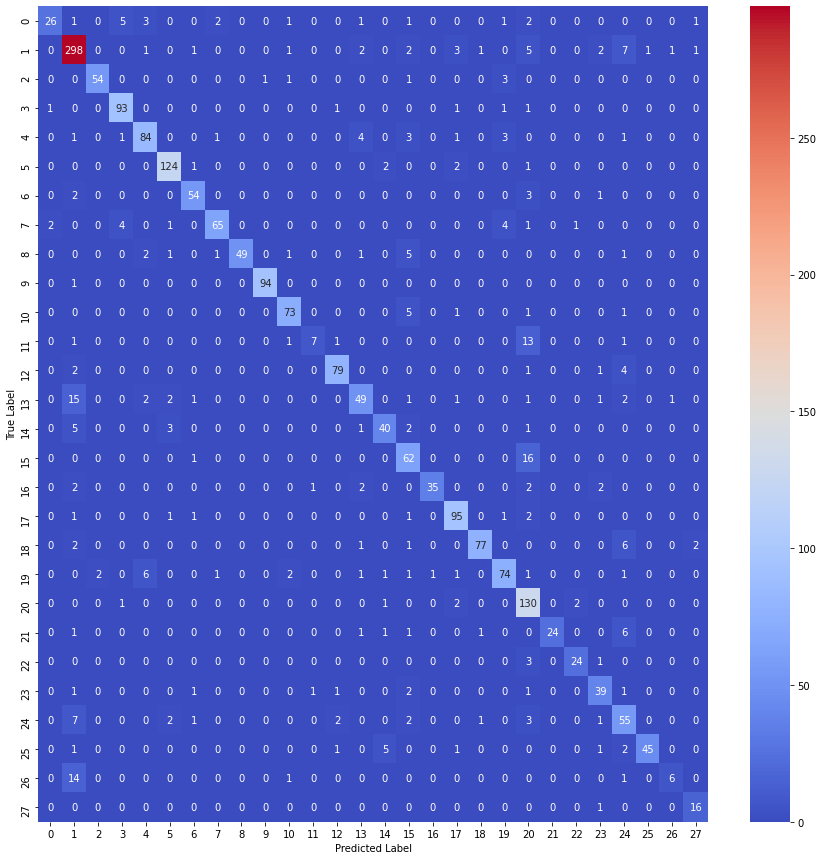

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(cm,cmap='coolwarm', annot=True, fmt="")
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()